# Chap01_1_Practice01_回归_房价预测

**使用线性回归构建房价预测模型** ,线性回归是最简单和经典的回归模型。 


**原理介绍:**  
> + 假设输入$X$为$d$维向量,$X=\{x_1,x_2,…,x_d\}$， 预测目标$y$为连续型取值。
> + 线性回归的模型形式为：
>> $$
y=b+w_1x_1+…+w_dx_d
$$
$$
y=w_0x_0+w_1x_1+…+w_dx_d
$$
其中：$x_0=1$

> + 下面我们通过线性回归构建房价预测模型，回归系数使用最小二乘法来估计。、

**数据介绍：**
> 此案例基于波士顿房价数据集: <br>
>1.样本数：506 <br>
>2.特征数量：13个特征（包括“类”属性“MEDV”），1个二进制值特征。
>>
|    特征       	|    说明                                                       	|
|---------------	|---------------------------------------------------------------	|
|    CRIM       	|    城镇人均犯罪率                                             	|
|    ZN         	|    大于25,000平方英尺的地块划分为住宅用地的比例               	|
|    INDUS      	|    每个城镇非零售业务的比例                                   	|
|    CHAS       	|    查尔斯河虚拟变量（如果管道界限= 1则为河;   =0则不为河）    	|
|    NOX        	|    一氧化氮浓度（每千万份）                                   	|
|    RM         	|    每间住宅的平均房间数                                       	|
|    AGE        	|    自住房屋是在1940年之前建造的比例                           	|
|    DIS        	|    到加州五个就业中心的加权距离                               	|
|    RAD        	|    对径向高速公路的可达性指数                                 	|
|    TAX        	|    每10,000美元的全价物业税                                   	|
|    PTRATIO    |    城镇的学生与教师比例                                       	|
|    B          	|    1000（Bk-0.63）^ 2其中Bk是城镇的黑人的比例                 	|
|    LSTAT      	|    低社会阶层人口比例％                                       	|
|    MEDV       	|    以1000美元为单位的自住房屋的中位数价值                     	|

**sklearn.linear_model**模块包含了常见的线性模型，即“预测目标能够表示成输入变量的线性组合形式”的模型。

例子中 y = 波士顿房价。 X = 其余的输入变量。
> - 首先，我们导入sklearn的linear_model模块。   
- 然后将预测变量从DataFrame中删除。  
- 再创建一个线性模型对象lr。

## 1)导入工具包
>```python
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
```

✎导入包

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# coding......
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


## 2)加载数据

> 有两种方法可以获取波士顿房价数据：
>> + way1: `sklearn.datasets`中有数据包，可通过`load_boston`加载，数据类型为`ndarray`
>> + way2: 通过外部`.csv`文件加载，使用`padnas.read_csv()`，数据类型为`DataFrame`/`Series`;文件位置`"./dataSets/BostonHousingData.csv"`

✎way1:加载并查看数据

In [37]:
# 通过sklearn.datasets自带的数据文件加载
from sklearn.datasets import load_boston
boston = load_boston()
# 查看特征数据,使用`data`属性
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [73]:
# 查看标签数据，使用`target`属性
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

✎way2:读取csv文件并查看数据`data`。 后续的分析都是基于这个`data`

In [5]:
# coding......
# csv:comma seprated values
data_file = './dataSets/BostonHousingData.csv'

In [39]:
# pd读取数据
data =pd.read_csv(data_file)

# 查看前5行
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
# 随机的五行
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
239,0.09252,30.0,4.93,0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
459,6.80117,0.0,18.10,0,0.713,6.081,84.4,2.7175,24,666,20.2,396.90,14.70,20.0


✎分离特征X(featrues)和标签y(labels)

In [43]:
type(data)

pandas.core.frame.DataFrame

In [45]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [48]:
data['target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [51]:
data[['CRIM','ZN','INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [50]:
# 获取标签数据y
#y = data.iloc[1:,-1].values
y = data['target']

# 获取特征数据X
# X = data.copy().drop(['target'],axis=1) 
X = data.copy().drop(['target'],axis=1) 

✎查看特征X(featrues)

In [53]:
data.shape

(506, 14)

In [41]:
# 查看特征数据X的前5行
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## 3)训练集-测试集划分
> - 比例为70%(train训练)--30%(test测试)，<br>
> - 在Sklearn中我们可以使用`model_selection`模块的`train_test_split`方法进行训练集和测试集划分。

✎以7:3比例划分`Train`与`Test`(参数`test_size=0.3，random_state=10`)

In [55]:
# 划分train与test数据
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

✎查看`X_train`和`X_test`的大小

In [63]:
X_train.shape

(354, 13)

In [62]:
X_test.shape

(152, 13)

## 4)模型构建与拟合
>`LinearRegression`类包含许多方法，其中以下三个方法是我们重点使用的方法。
>> 1. lr.fit(): 训练一个线性模型
>> 2. lr.predict()： 利用训练好的线性模型进行预测
>> 3. lr.score()：返回线性模型的决定系数$R^2$。


✎构建并训练lr

In [56]:
# 构建线性回归模型lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 训练模型lr
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 5)模型预测

✎使用训练好的`lr`进行预测

In [57]:
# 预测
y_predict = lr.predict(X_test)

In [58]:
y_predict[:5]

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235])

In [60]:
y_test[:5]

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
Name: target, dtype: float64

## 6)模型评价

In [66]:
len(X_test)

152

In [67]:
len(y_test)

152

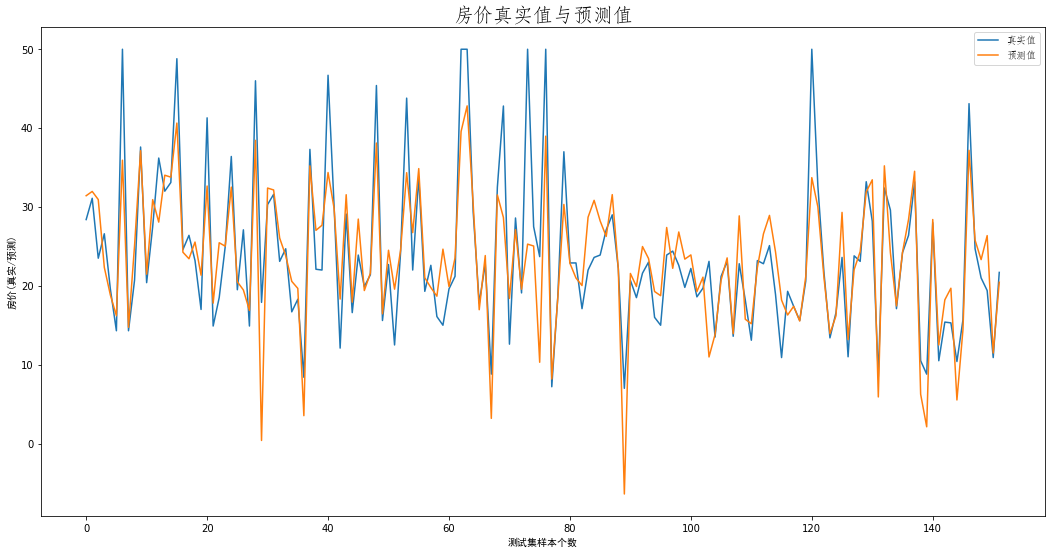

In [65]:
# 图显：画出真实值与预测值
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm   # 字体管理
%matplotlib inline

# 设置图尺寸
plt.figure(figsize =(18,9))

# 构建作图的x_,y_值
x_ = range(len(y_test))

# 画图
## (1) 绘制测试集的真实折线图
plt.plot(x_,y_test,label="真实值")
## (2) 绘制预测值的折线图
plt.plot(x_,y_predict,label="预测值")

# x，y轴标签
plt.xlabel("测试集样本个数",fontproperties='simhei')
plt.ylabel("房价(真实/预测)",fontproperties='simhei')

# 创建标题(使用自己系统中的中文字体)
myfont = fm.FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.title("房价真实值与预测值",fontproperties=myfont,fontsize=20)

# 创建图例
plt.legend(prop=myfont)

# 图显
plt.show()

✎模型评价指标1：`RMSE`均方误差
> `RMSE`是预测值与真实值的**误差平方根的均值**,是一种定量的权衡方法,**值越小越好**。

In [69]:
# mean_squared_error,均方误差(真实值,预测值)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

29.326596526123247

✎模型评价指标2：回归决定系数R2(拟合优度)
> + R2方法是将预测值跟只使用均值的情况下相比，看能好多少。<br>
> + 其区间在（0,1）之间，值大小表示与均值拟合相比的优秀程度，0表示不如均值；1表示完美预测。<br>
>> + 即：0表示还不如什么都不预测，直接取均值的情况，
>> + 而1表示所有预测跟真实结果完美匹配的情况。<br>
>> + 如果是负数(<0),则表示模型还不如均值拟合，说明X与y不存在线性关系<br>
参考：https://blog.csdn.net/snowdroptulip/article/details/79022532<br>
参考：https://www.cnblogs.com/leezx/p/9929678.html

In [70]:
# r2_score(真实值,预测值)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6996255772983115

在完成模型训练后，我们可以通过`lr.coef_`和`lr.intercept_`获取回归系数和截距。

✎查看`lr`模型参数1：coefficient,系数(斜率)

In [71]:
lr.coef_

array([-1.53776087e-01,  6.50159270e-02, -2.42597326e-02,  1.62203309e+00,
       -1.52999306e+01,  3.35196668e+00,  1.13259963e-02, -1.54810871e+00,
        3.02641886e-01, -1.22317535e-02, -8.11539044e-01,  1.29504798e-02,
       -5.44861583e-01])

✎查看`lr`模型参数2：intercept,截距

In [72]:
lr.intercept_

34.244837033906755

## 7)完整代码

In [1]:

# 1)导入工具包
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 2)加载数据,定义X,y
data = pd.read_csv('./dataSets/BostonHousingData.csv')
y = data['target']
X = data.copy().drop(['target'], axis=1)

# 3)训练集-测试集划分，比例为70%(训练)--30%(测试)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 4)模型构建与拟合
lr = LinearRegression()
lr.fit(X_train, y_train)

# 5)模型预测
y_pred = lr.predict(X_test)
# 6)模型评价
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))#均方误差

0.7469985947198511
22.030419310809275
